# Step 1: Loading and Exploring the Dataset

Dataset shape: (1797, 64)


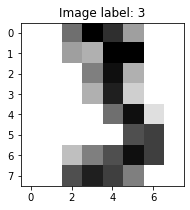

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Print the shape of the data to understand its size
print("Dataset shape:", digits.data.shape)

# Display one sample image
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Image label: {digits.target[sample_index]}")
plt.show()

# Step 2: Preprocessing the Data

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Convert data to the right format
data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=37)

# Normalize the data
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the new sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1527, 64)
Test set shape: (270, 64)


## Visualizing Normalization

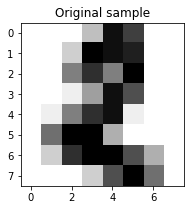

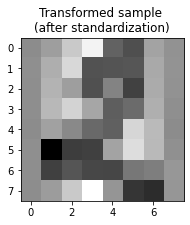

In [3]:
# Show the original sample
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Original sample")
plt.show()

# Show a transformed sample
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Transformed sample \n(after standardization)")
plt.show()

# Step 3: Preparing Labels for Classification

In [4]:
import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical

# Look at original labels
print("Original labels:", y_train[:3])

# Convert to one-hot encoding
Y_train = to_categorical(y_train)
print("One-hot encoded labels:\n", Y_train[:3])

Using TensorFlow backend.


Original labels: [2 9 5]
One-hot encoded labels:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


# Step 4: Building and Training the Neural Network

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

# Define the model
N = X_train.shape[1]  # 64 (input features)
H = 100               # 100 neurons in hidden layer
K = 10                # 10 classes (output)

model = Sequential()
model.add(Dense(H, input_dim=N))    # Hidden layer
model.add(Activation("tanh"))       # Activation function
model.add(Dense(K))                 # Output layer
model.add(Activation("softmax"))    # Output activation

# Compile the model
model.compile(optimizer=optimizers.SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=15, batch_size=32)

# Show model summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/15
1527/1527 [==============================] - 0s 264us/step - loss: 0.7902 - accuracy: 0.8075
Epoch 2/15
1527/1527 [==============================] - 0s 101us/step - loss: 0.2764 - accuracy: 0.9430
Epoch 3/15
1527/1527 [==============================] - 0s 96us/step - loss: 0.1907 - accuracy: 0.9640
Epoch 4/15
1527/1527 [==============================] - 0s 100us/step - loss: 0.1495 - accuracy: 0.9718
Epoch 5/15
1527/1527 [==============================] - 0s 101us/step - loss: 0.1241 - accuracy: 0.9771
Epoch 6/15
1527/1527 [==============================] - 0s 102us/step - loss: 0.1068 - accuracy: 0.9804
Epoch 7/15
1527/1527 [==============================] - 0s 92us/step - loss: 0.0937 - accuracy: 0.9849
Epoch 8/15
1527/1527 [==============================] - 0s 94us/step - loss: 0.0834 - accuracy: 0.9869
Epoch 9/15
1527/1527 [==============================] - 0s 98us/step - loss: 0.0747 - acc

# Step 5: Visualizing Training Progress

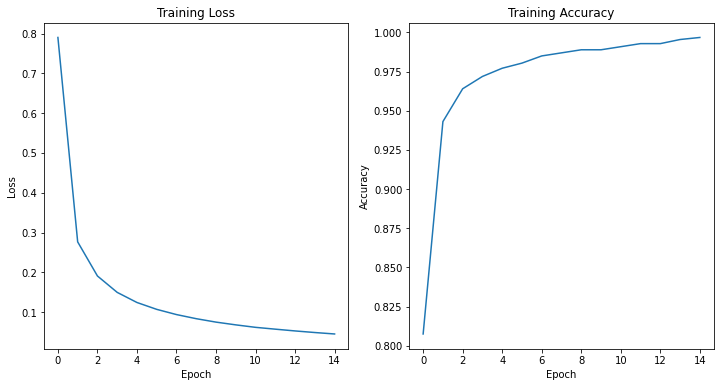

In [6]:
# Training Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Step 6: Evaluating the Model

In [7]:
# Convert test labels to one-hot encoding
Y_test = to_categorical(y_test)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

270/270 [==============================] - 0s 350us/step
Test Loss: 0.0875
Test Accuracy: 0.9704


# Step 7: Experimenting with the Model

Epoch 1/15
1527/1527 [==============================] - 0s 178us/step - loss: 0.0407 - accuracy: 0.9980
Epoch 2/15
1527/1527 [==============================] - 0s 96us/step - loss: 0.0406 - accuracy: 0.9980
Epoch 3/15
1527/1527 [==============================] - 0s 84us/step - loss: 0.0406 - accuracy: 0.9980
Epoch 4/15
1527/1527 [==============================] - 0s 88us/step - loss: 0.0406 - accuracy: 0.9980
Epoch 5/15
1527/1527 [==============================] - 0s 88us/step - loss: 0.0406 - accuracy: 0.9980
Epoch 6/15
1527/1527 [==============================] - 0s 83us/step - loss: 0.0405 - accuracy: 0.9980
Epoch 7/15
1527/1527 [==============================] - 0s 86us/step - loss: 0.0405 - accuracy: 0.9980
Epoch 8/15
1527/1527 [==============================] - 0s 86us/step - loss: 0.0405 - accuracy: 0.9980
Epoch 9/15
1527/1527 [==============================] - 0s 87us/step - loss: 0.0404 - accuracy: 0.9980
Epoch 10/15
1527/1527 [==============================] - 0s 90us/step - 

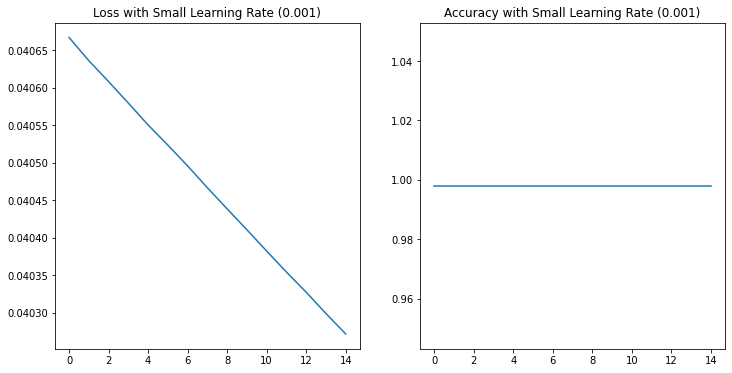

In [8]:
# Try a smaller learning rate
model.compile(optimizer=optimizers.SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_slow = model.fit(X_train, Y_train, epochs=15, batch_size=32)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_slow.history['loss'])
plt.title('Loss with Small Learning Rate (0.001)')
plt.subplot(1, 2, 2)
plt.plot(history_slow.history['accuracy'])
plt.title('Accuracy with Small Learning Rate (0.001)')
plt.show()

# Step 8: Exploring Weight Initialization

Epoch 1/15
1527/1527 [==============================] - 0s 212us/step - loss: 2.0064 - accuracy: 0.5684
Epoch 2/15
1527/1527 [==============================] - 0s 108us/step - loss: 0.8810 - accuracy: 0.7996
Epoch 3/15
1527/1527 [==============================] - 0s 110us/step - loss: 0.4319 - accuracy: 0.9083
Epoch 4/15
1527/1527 [==============================] - 0s 104us/step - loss: 0.2701 - accuracy: 0.9463
Epoch 5/15
1527/1527 [==============================] - 0s 123us/step - loss: 0.2013 - accuracy: 0.9581
Epoch 6/15
1527/1527 [==============================] - 0s 109us/step - loss: 0.1628 - accuracy: 0.9659
Epoch 7/15
1527/1527 [==============================] - 0s 111us/step - loss: 0.1382 - accuracy: 0.9718
Epoch 8/15
1527/1527 [==============================] - 0s 103us/step - loss: 0.1206 - accuracy: 0.9751
Epoch 9/15
1527/1527 [==============================] - 0s 115us/step - loss: 0.1074 - accuracy: 0.9810
Epoch 10/15
1527/1527 [==============================] - 0s 113u

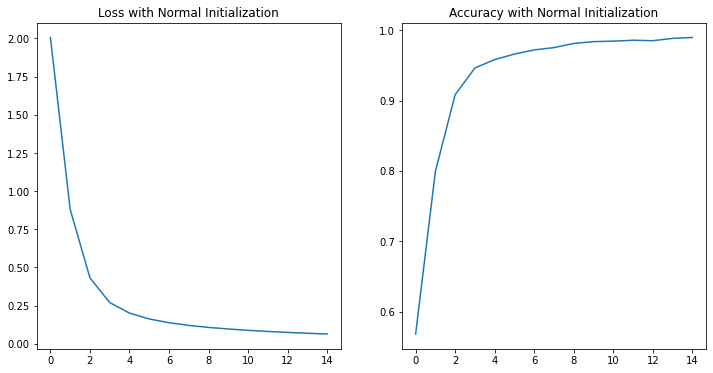

In [9]:
from keras import initializers

# Use normal initialization
normal_init = initializers.RandomNormal(stddev=0.01)

model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

history_init = model.fit(X_train, Y_train, epochs=15, batch_size=32)

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_init.history['loss'])
plt.title('Loss with Normal Initialization')
plt.subplot(1, 2, 2)
plt.plot(history_init.history['accuracy'])
plt.title('Accuracy with Normal Initialization')
plt.show()

### Try adding more layers or neurons (e.g., change H to 200).
### Use a different optimizer like optimizers.Adam() instead of SGD.

Epoch 1/15
1527/1527 [==============================] - 0s 236us/step - loss: 1.5776 - accuracy: 0.7302
Epoch 2/15
1527/1527 [==============================] - 0s 111us/step - loss: 0.5000 - accuracy: 0.8893
Epoch 3/15
1527/1527 [==============================] - 0s 104us/step - loss: 0.2416 - accuracy: 0.9456
Epoch 4/15
1527/1527 [==============================] - 0s 102us/step - loss: 0.1636 - accuracy: 0.9673
Epoch 5/15
1527/1527 [==============================] - 0s 102us/step - loss: 0.1250 - accuracy: 0.9758
Epoch 6/15
1527/1527 [==============================] - 0s 102us/step - loss: 0.1024 - accuracy: 0.9777
Epoch 7/15
1527/1527 [==============================] - 0s 98us/step - loss: 0.0837 - accuracy: 0.9843
Epoch 8/15
1527/1527 [==============================] - 0s 102us/step - loss: 0.0719 - accuracy: 0.9849
Epoch 9/15
1527/1527 [==============================] - 0s 101us/step - loss: 0.0629 - accuracy: 0.9882
Epoch 10/15
1527/1527 [==============================] - 0s 99us/

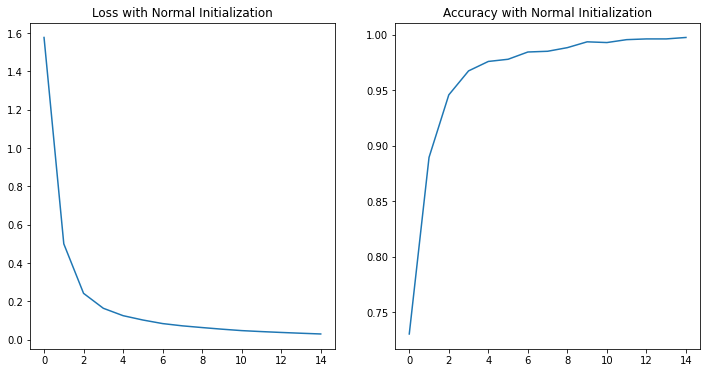

In [10]:
from keras import initializers

# Use normal initialization
normal_init = initializers.RandomNormal(stddev=0.01)

model = Sequential()
model.add(Dense(200, input_dim=N, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history_init = model.fit(X_train, Y_train, epochs=15, batch_size=32)

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_init.history['loss'])
plt.title('Loss with Normal Initialization')
plt.subplot(1, 2, 2)
plt.plot(history_init.history['accuracy'])
plt.title('Accuracy with Normal Initialization')
plt.show()